In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
import torchvision.models as models
from torchvision import transforms
from torchvision.utils import save_image
from torchsummary import summary

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#from google.colab import files
#%matplotlib inline

In [2]:
# Выбираем устройство GPU, если доступено, если нет то CPU
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")


In [3]:
path = 'Vitebsk_street.jpg'
path_2 = 'Dove.jpg'


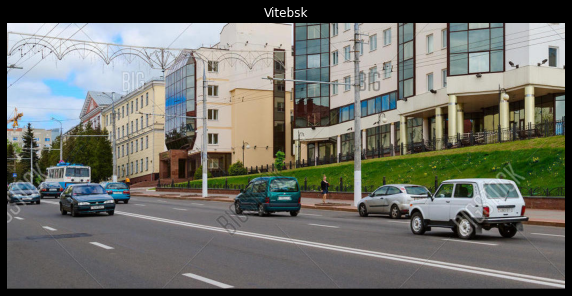

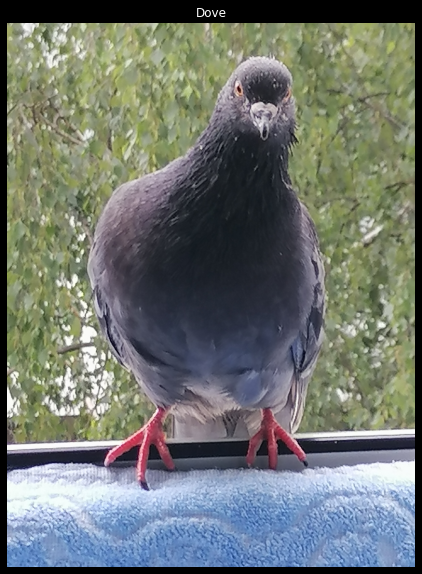

In [4]:
image = Image.open(path)
plt.figure(figsize=(10, 10))
plt.title('Vitebsk')
plt.axis('off')
plt.imshow(image)

image = Image.open(path_2)
plt.figure(figsize=(10, 10))
plt.title('Dove')
plt.axis('off')
plt.imshow(image)

plt.show()


In [11]:
model = models.segmentation.fcn_resnet50(pretrained=1).eval()     #deeplabv3_resnet101deeplabv3_resnet50


Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to C:\Users\Serge/.cache\torch\hub\checkpoints\fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:16<00:00, 8.42MB/s]


In [12]:
def decode_segmap(image, n_classes=21):
    label_colors = np.array([
                             (0, 0, 0),
                             (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
                             (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
                             (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                             (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)
                            ])

    r = np.zeros_like(image) #.asytpe(np.uint8)
    g = np.zeros_like(image) #.asytpe(np.uint8)
    b = np.zeros_like(image) #.asytpe(np.uint8)

    for rgb in range(0, n_classes):
        idx = image == rgb
        r[idx] = label_colors[rgb, 0]
        g[idx] = label_colors[rgb, 1]
        b[idx] = label_colors[rgb, 2]

    RGB = np.stack([r, g, b], axis = 2)
    return RGB



In [13]:
def segment(net, path, origin=True, dev='cpu'):
    img = Image.open(path)
    if origin:
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    img_loader = transforms.Compose([
                                 transforms.Resize((512, 512)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                                                      std = [0.229, 0.224, 0.225])
                                ])
    input = img_loader(img).unsqueeze(0).to(dev)
    output = net.to(dev)(input)['out']
    om = torch.argmax(output.squeeze(), dim=0).detach().cpu().numpy()
    image_rgb = decode_segmap(om)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


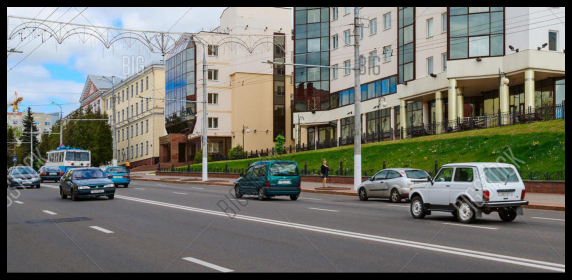

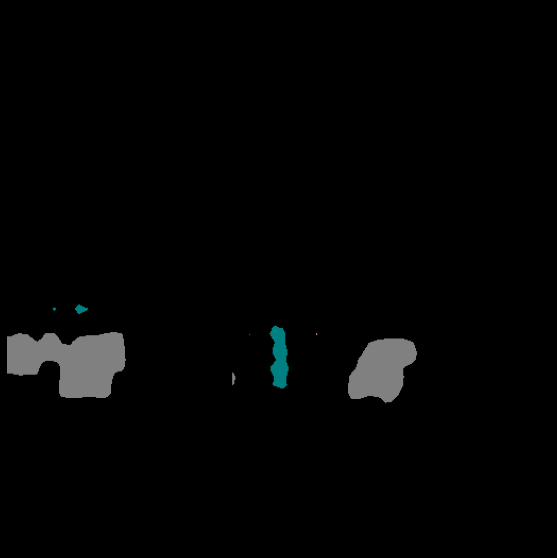

In [14]:
segment(model, path)


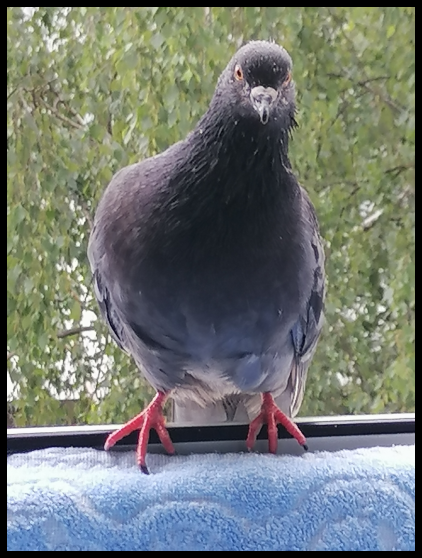

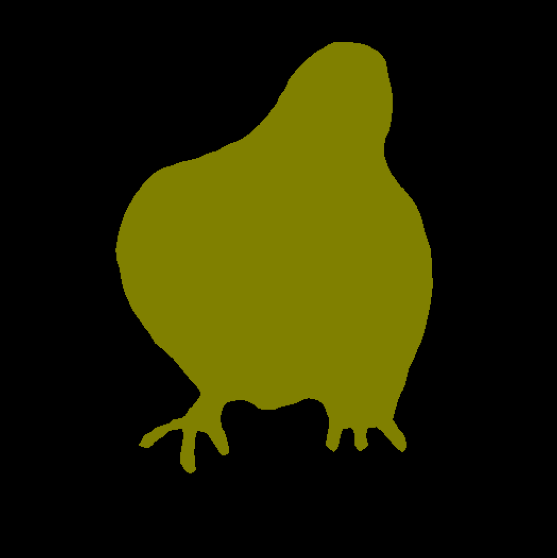

In [15]:
segment(model, path_2)